# task :1

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
s1="The queen who travelled across the vast kingdom governs wisely"


In [16]:
word=s1.lower().split()

In [17]:
vocab=sorted(list(set(word)))

In [18]:
bow_vec=np.zeros(len(vocab),dtype=int)
for w in words :
    bow_vec[vocab.index(w)] += 1

In [19]:
print("bow vector:",bow_vec)

bow vector: [1 1 1 1 2 1 1 1 1]


In [20]:
co_matrix=np.outer(bow_vec,bow_vec)

In [21]:
print(co_matrix)

[[1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]
 [2 2 2 2 4 2 2 2 2]
 [1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]]


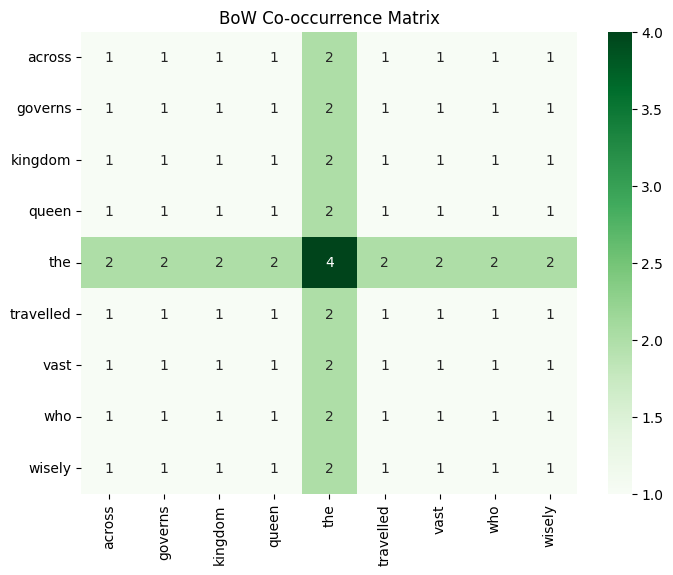

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(co_matrix, annot=True, cmap="Greens",
            xticklabels=vocab, yticklabels=vocab)
plt.title("BoW Co-occurrence Matrix")
plt.show()

# task :2 Self-Attention
1. Assign random embeddings to each word.
2. Compute dot-product score matrix.
3. Apply softmax row-wise.
4. Visualize the attention matrix as a heatmap.


In [24]:
embeddings = {w: np.random.randn(16) for w in words}


In [25]:
X = np.array([embeddings[w] for w in words])
scores = X @ X.T


In [26]:
print(scores)

[[ 9.77934297e+00  4.77352945e+00  2.98034452e+00  6.72079653e-01
  -1.26538248e+00  9.77934297e+00 -4.69862354e+00 -6.09667408e-01
   6.38262154e-01  1.79205718e+00]
 [ 4.77352945e+00  1.72329071e+01 -2.21742620e+00 -2.35759720e-01
  -1.67967439e+00  4.77352945e+00 -1.76030557e+00 -1.91798993e+00
   2.01269292e+00  7.95609064e+00]
 [ 2.98034452e+00 -2.21742620e+00  1.10226289e+01 -3.06306345e+00
  -2.57445466e+00  2.98034452e+00 -5.07586761e+00  1.39859880e+00
   4.22783773e+00 -3.59948977e+00]
 [ 6.72079653e-01 -2.35759720e-01 -3.06306345e+00  9.20353563e+00
   4.90095992e-01  6.72079653e-01 -8.24803362e-02  6.08643395e-01
  -3.35833658e+00  7.46123137e-01]
 [-1.26538248e+00 -1.67967439e+00 -2.57445466e+00  4.90095992e-01
   2.10176284e+01 -1.26538248e+00  2.30447230e+00 -4.01124837e+00
   6.18861190e+00  3.76535746e-01]
 [ 9.77934297e+00  4.77352945e+00  2.98034452e+00  6.72079653e-01
  -1.26538248e+00  9.77934297e+00 -4.69862354e+00 -6.09667408e-01
   6.38262154e-01  1.79205718e+00

In [27]:
def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum()

attention_matrix = np.array([softmax(row) for row in scores])


<Axes: >

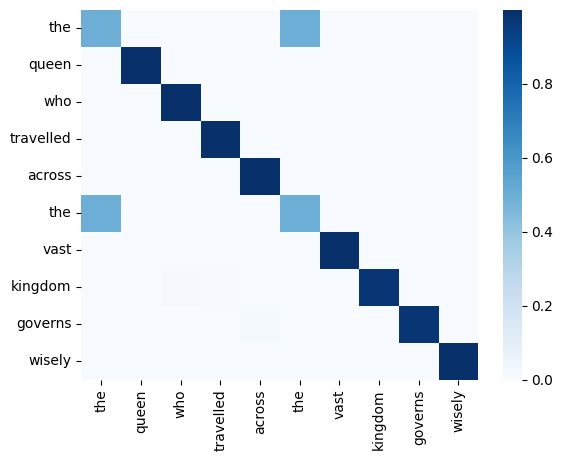

In [28]:
sns.heatmap(attention_matrix, annot=False, cmap="Blues",
            xticklabels=words, yticklabels=words)
